In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('T1D_GWAS.tsv', sep='\t') # Make the table readable using pandas

# -log the P-values and column to the table
df['-logp']= - np.log(df['P-VALUE'])

# Put variants in order by max position in chromosome
running_pos = 0 # moves all integers down so first pos is 0
 
cumulative_pos = [] # create list of new series for position in whole genome

for chrom, group_df in df.groupby('CHR_ID'): # Group the region in each chromosome together
    cumulative_pos.append(group_df['CHR_POS'] + running_pos) 
    running_pos+= group_df['CHR_POS'].max() #tells us the last position in each chromosome
    
df['cumulative_pos'] = pd.concat(cumulative_pos) # Position of variant relative to whole chromosome, add column to the table

import seaborn as sns
%matplotlib inline
df
df.to_csv('T1D_GWAS_add.tsv', sep ='\t')
df

,SNPS,REGION,CHR_POS,CHR_ID,P-VALUE,MAPPED_GENE,-logp,cumulative_pos
0,rs559047,1q43,238590616,1,4.000000e-06,KRT18P32 - NA,12.429216,238590616
1,rs559047,1q43,238590616,1,4.000000e-08,KRT18P32 - NA,17.034386,238590616
2,rs2990510,1q31.3,197051528,1,6.000000e-06,F13B,12.023751,197051528
3,rs2153977,1p13.2,113537449,1,4.000000e-07,MAGI3,14.731801,113537449
4,rs2476601,1p13.2,113834946,1,7.000000e-20,PTPN22,44.105792,113834946
...,...,...,...,...,...,...,...,...
637,rs428595,22q11.21,21662102,22,2.000000e-06,MIR130B - PPIL2,13.122363,2576063177
638,rs428595,22q11.21,21662102,22,1.000000e-06,MIR130B - PPIL2,13.815511,2576063177
639,rs373009901,22q12.1,25592812,22,9.000000e-06,GRK3,11.618286,2579993887
640,rs4820830,22q12.2,30135102,22,1.000000e-12,HORMAD2,27.631021,2584536177


Text(0.5, 0.98, 'GWAS Plot showing Association between SNPs in T1DM')

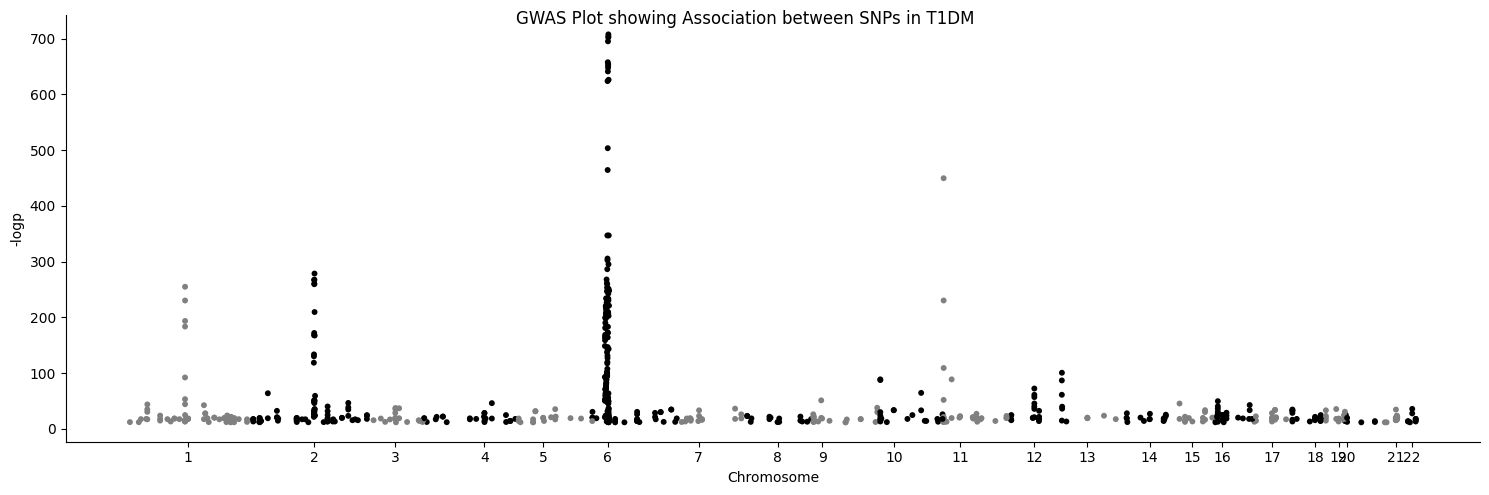

In [4]:
my_data = df.sample(642)

g=sns.relplot(
    data = my_data, # for whole genome this number will be 10000, or however many you want to see
    x= 'cumulative_pos',
    y= '-logp',
    aspect = 3, # size of graph
    hue = 'CHR_ID', # for whole genome this is the chromosome
    palette= ['grey','black'] * 11, #random colour scheme, can be changed to any colour(s)
    linewidth=0,
    size=4,
    legend=None
)

# Editing x-axis and making it neater
g.ax.set_xlabel('Chromosome') # x-axis label

# Setting where the labels in the x-axis should be
g.ax.set_xticks(df.groupby('CHR_ID')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR_ID'].unique())


# Add title to graph
g.fig.suptitle('GWAS Plot showing Association between SNPs in T1DM')

# Create annotations for each SNP point
#annotations = my_data[my_data['-logp'] > 20].apply(lambda p : g.ax.annotate(p['SNPS'], (p['cumulative_pos'], p['-logp'])), axis=1).to_list()

#adjust_text(annotations, arrowprops = {'arrowstyle': '->', 'color':'blue'})

In [6]:
pip install flask


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install flask-wtf


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import base64
from io import BytesIO

from flask import Flask
from matplotlib.figure import Figure

app = Flask(__name__)


@app.route("/")
def hello():
    # Generate the figure **without using pyplot**.
    fig = Figure()
    g.ax = fig.subplots()
    g.ax.plot([])
    # Save it to a temporary buffer.
    buf = BytesIO()
    fig.savefig(buf, format="png")
    # Embed the result in the html output.
    data = base64.b64encode(buf.getbuffer()).decode("ascii")
    return f"<img src='data:image/png;base64,{data}'/>"